Created By: YaminiKalyani Gandrothu(100780823) for Machine Learning - Final Project Part 1.

I have taken the Sarcasm Headlines dataset which consists of 26,709 news headlines. Of these headlines, 43.9% are satire, and 56.1% are real. Each record consists of three attributes. The first was a Boolean variable indicating whether the headline is sarcastic or not. The second was the news headline itself. The third was the URL of the article.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read DataSet from Git Hub
sar_acc = pd.read_json("https://raw.githubusercontent.com/YaminiKalyani/ML/master/Sarcasm_Headlines_Dataset_v2.json", lines=True)
#sar_acc.shape
import re
sar_acc['source'] = sar_acc['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
sar_acc.head()

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


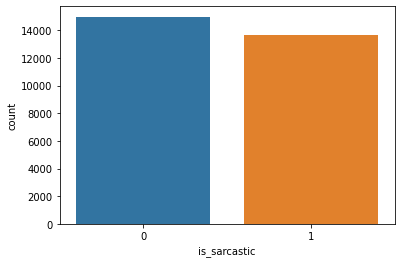

In [ ]:
# advance ploting
import seaborn as sns
sns.countplot(sar_acc["is_sarcastic"])

In [ ]:
# to plot wordcloud
# =================
from wordcloud import WordCloud
from wordcloud import STOPWORDS
def plot_wordcloud(headlines, cmap):
    fig, ax = plt.subplots(figsize=(8, 6))
    wc = WordCloud(max_words = 1000, background_color ='white', stopwords = STOPWORDS, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(headlines)
    plt.axis('off')
    plt.imshow(wc)

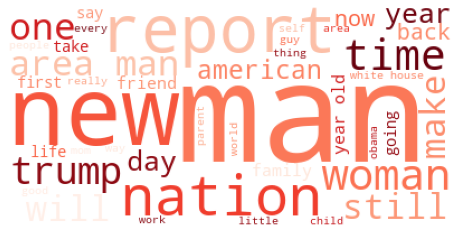

In [ ]:
# As a basic exploration, following two figures visualize the word clouds through which we can see the types of words that occur frequently in each category.
# word cloud of saracastic headlines
sarcastic = ' '.join(sar_acc[sar_acc['is_sarcastic']==1]['headline'].to_list())
plot_wordcloud(sarcastic, 'Reds')

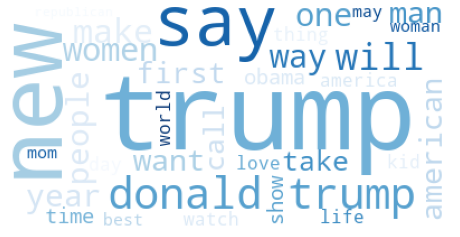

In [ ]:
# word cloud of non-saracastic headlines
non_sarcastic = ' '.join(sar_acc[sar_acc['is_sarcastic']==0]['headline'].to_list())
plot_wordcloud(non_sarcastic, 'Blues')

Adding new columns to the data for better visuals and expose the underlying data patterns to machine learning algorithms.

In [ ]:
import string
## Number of words in the text ##
sar_acc["num_words"] = sar_acc["headline"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
sar_acc["num_unique_words"] = sar_acc["headline"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
sar_acc["num_chars"] = sar_acc["headline"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
sar_acc["num_stopwords"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
sar_acc["num_punctuations"] =sar_acc['headline'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
sar_acc["num_words_upper"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
sar_acc["num_words_title"] = sar_acc["headline"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
sar_acc["mean_word_len"] = sar_acc["headline"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


Plot graph which shows how the words are distributed in Sarcastic and Non  Sarcastic headlines.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


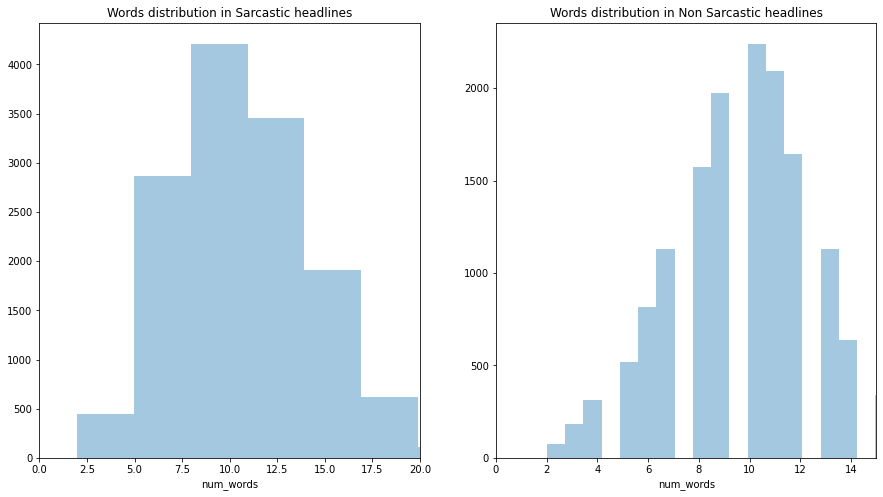

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.xlim(0, 20)
sns.distplot(sar_acc[sar_acc.is_sarcastic==1]["num_words"], kde=False)
plt.title("Words distribution in Sarcastic headlines")
plt.grid(False)

plt.subplot(1,2,2)
plt.xlim(0, 15)
sns.distplot(sar_acc[sar_acc.is_sarcastic==0]["num_words"], kde=False)
plt.title("Words distribution in Non Sarcastic headlines")

plt.grid(False)
plt.show()

In [ ]:
# Create the input(X) and output(Y) vectors and then preprocess the lables.
from sklearn.preprocessing import LabelEncoder
X = sar_acc.headline
Y = sar_acc.is_sarcastic
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
# Split into Training and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Processing the data for the model

- Tokenize the data and convert the text to sequences.

- Add padding to ensure that all the sequences have the same shape.

- There are many ways of taking the max_len and here an arbitrary length of 150 is chosen

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Model#1 : Linear SVC 

In [ ]:
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

model = LinearSVC(loss="hinge",fit_intercept=False, max_iter=1500)
model = model.fit(sequences_matrix, Y_train) 
predictions = model.predict(test_sequences_matrix)

svc_train_acc = accuracy_score(Y_train, model.predict(sequences_matrix))
svc_test_acc = accuracy_score(Y_test, predictions)
svc_f1_score = f1_score(predictions, Y_test)
print("Accuracy score: \n a) Train : {} \n b) Test : {}".format(svc_train_acc, svc_test_acc))
print("Precision score: ", precision_score(Y_test, predictions))
print("Recall score: ", recall_score(Y_test, predictions))
print("F1 score : ", svc_f1_score)

confusion_matrix(Y_test, predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 
 a) Train : 0.5080585280628959 
 b) Test : 0.5183438155136268
Precision score:  0.4753199268738574
Recall score:  0.19237883832778394
F1 score :  0.2739004477218857


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[2447,  574],
       [2183,  520]])

Model#2: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200)
model_rf = model_rf.fit(sequences_matrix, Y_train) 
predictions = model_rf.predict(test_sequences_matrix)

rf_train_acc = accuracy_score(Y_train, model_rf.predict(sequences_matrix))

rf_test_acc = accuracy_score(Y_test, predictions)
rf_f1_score = f1_score(predictions, Y_test)
print("Accuracy score: \n a) Train : {} \n b) Test : {}".format(rf_train_acc, rf_test_acc))
print("Precision score: ", precision_score(Y_test, predictions))
print("Recall score: ", recall_score(Y_test, predictions))
print("F1 score : ", rf_f1_score)

confusion_matrix(Y_test, predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy score: 
 a) Train : 0.9893863288927713 
 b) Test : 0.6589797344514325
Precision score:  0.6471971775774206
Recall score:  0.610802811690714
F1 score :  0.6284735439665017


array([[2121,  900],
       [1052, 1651]])

Model#3: Ada Boost Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)

model_ada = AdaBoostClassifier(base_estimator=tree)
model_ada = model_ada.fit(sequences_matrix, Y_train)
predictions = model_ada.predict(test_sequences_matrix)

ada_train_acc = accuracy_score(Y_train, model_ada.predict(sequences_matrix))
ada_test_acc = accuracy_score(Y_test, predictions)
ada_f1_score = f1_score(predictions, Y_test)
print("Accuracy score: \n a) Train : {}\n b) Test : {}".format(ada_train_acc, ada_test_acc))
print("Precision score: ", precision_score(Y_test, predictions))
print("Recall score: ", recall_score(Y_test, predictions))
print("F1 score : ",  ada_f1_score)

confusion_matrix(Y_test, predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 
 a) Train : 0.9893863288927713
 b) Test : 0.59958071278826
Precision score:  0.5944827586206897
Recall score:  0.47835738068812433
F1 score :  0.5301353013530136


array([[2139,  882],
       [1410, 1293]])

Model#4: Recurrent Neural Networks

In [ ]:
# Defining the RNN structure for the model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
from keras.callbacks import EarlyStopping
better_history=model.fit(sequences_matrix,Y_train,batch_size=100,epochs=3,
          validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                

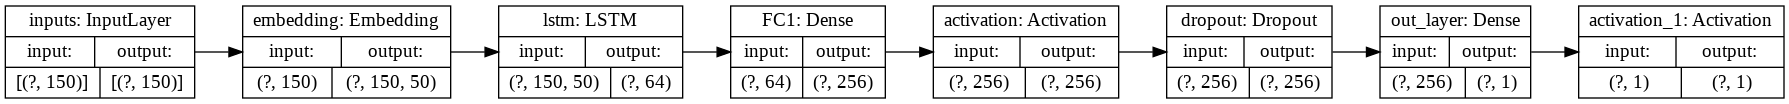

In [ ]:
#plot RNN model
import tensorflow as tf
from tensorflow import keras
keras.utils.plot_model(model, to_file="RNN.png", show_shapes=True, rankdir="LR")

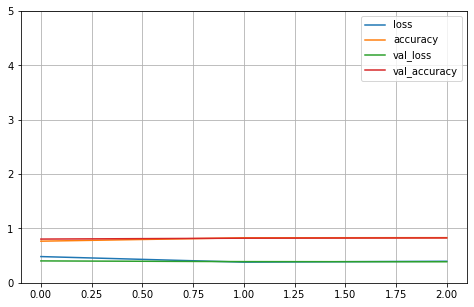

In [ ]:
#history
import matplotlib.pyplot as plt
pd.DataFrame(better_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

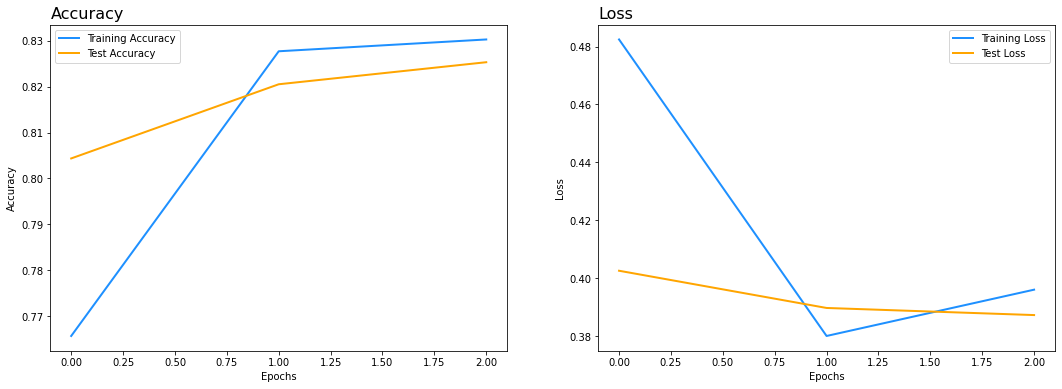

In [ ]:
# to plot model accuracy and loss on change of Epochs

def plot_history(history):
    
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='dodgerblue', lw='2')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy', c='orange', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='dodgerblue', lw='2')
    plt.plot(history.history['val_loss'], label='Test Loss', c='orange', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(better_history)

In [ ]:
# Calculating accuracy on train and test data
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
rnn_test_acc = accr[1]
rnn_train_acc = accuracy_score(Y_train, model.predict(sequences_matrix).round())
# predict values
pred = model.predict(test_sequences_matrix)

rnn_f1_score = f1_score(pred.round(), Y_test)
print("Accuracy score: \n a) Train : {}\n b) Test : {}".format(rnn_train_acc, rnn_test_acc))
print("Precision score: ", precision_score(Y_test, pred.round()))
print("Recall score: ", recall_score(Y_test, pred.round()))
print("F1 score : ", rnn_f1_score)

179/179 [==============================] - 3s 17ms/step - loss: 0.4050 - accuracy: 0.8187
Test set
  Loss: 0.405
  Accuracy: 0.819
Accuracy score: 
 a) Train : 0.8451626992793186
 b) Test : 0.8186582922935486
Precision score:  0.7934437786394078
Recall score:  0.8327783943766186
F1 score :  0.8126353790613718


In [ ]:
# to plot confusion matrix for RNN model

def plot_cm(pred):
    
    pred = pred.ravel()
    pred = np.round(pred)
    
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    cm = confusion_matrix(Y_test, pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt='1d', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_yticklabels(['Non-Sarcastic', 'Sarcastic', ])
    ax.set_xticklabels(['Non-Sarcastic', 'Sarcastic'])

    plt.show()

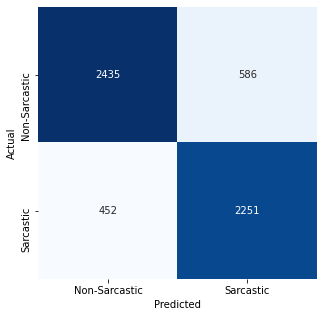

In [ ]:
# Confusion Matrix for RNN model
plot_cm(pred)

Finally showing the models performance in a table. 
RNN model performance is eally great when compared with other model results.

In [ ]:
models = [('Linear SVC', svc_train_acc, svc_test_acc, svc_f1_score),
          ('Random Forest', rf_train_acc, rf_test_acc, rf_f1_score),
          ('Ada boost', ada_train_acc, ada_test_acc, ada_f1_score),
          ('RNN', rnn_train_acc, rnn_test_acc, rnn_f1_score)
         ]
         
predict = pd.DataFrame(data = models, columns=['Model', 'Train accuracy', 'Test accuracy', 'F1 score'])
predict

,Model,Train accuracy,Test accuracy,F1 score
0,Linear SVC,0.508059,0.518344,0.273900
1,Random Forest,0.989386,0.658980,0.628474
2,Ada boost,0.989386,0.599581,0.530135
3,RNN,0.845163,0.818658,0.812635
